In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("lahore_house_listings_zameen.csv")

In [3]:
df.head()

,Title,Location,Type,Price,Area,Bedrooms,Bathrooms,Purpose,Date Posted,Built Year,...,Furnished,Gym,Study Room,Drawing Room,Dining Room,Lawn/Garden,Swimming Pool,Electricity Backup,Lounge/Sitting Room,Link
0,ACTUALLY 25 MARLA DOUBLE UNIT LUXURIOUS & GRAC...,"DHA Phase 6 - Block F, DHA Phase 6, DHA Defenc...",House,8.15 Crore,1 Kanal,6,7,For Sale,2025-07-27,2024.0,...,True,True,True,True,True,True,True,True,True,https://www.zameen.com/Property/dha_phase_6_dh...
1,3 Years Installment Plan Luxury Brand New Hous...,"Park View City, Lahore, Punjab",House,1.5 Crore,5 Marla,4,5,For Sale,2025-07-25,2012.0,...,True,False,False,True,True,True,False,True,True,https://www.zameen.com/Property/lahore_park_vi...
2,5 Marla Luxury House In Rose Block Of Park-Vie...,"Park View City - Rose Block, Park View City, L...",House,2.4 Crore,5 Marla,4,4,For Sale,2025-07-25,2025.0,...,True,True,True,True,True,True,True,True,True,https://www.zameen.com/Property/park_view_city...
3,Full Basement 1 kanal Brand New Luxury House N...,"DHA Phase 7 - Block S, DHA Phase 7, DHA Defenc...",House,7.5 Crore,1 Kanal,5,6,For Sale,2025-07-25,2024.0,...,False,True,True,True,True,True,True,True,True,https://www.zameen.com/Property/dha_phase_7_dh...
4,1 Kanal Dream Home With Private Pool In DHA Ph...,"DHA Phase 6, DHA Defence, Lahore, Punjab",House,6.95 Crore,1 Kanal,6,7,For Sale,2025-07-25,2024.0,...,True,True,True,True,True,True,True,True,True,https://www.zameen.com/Property/dha_defence_dh...


In [4]:
df.describe()

,Built Year,Kitchens,Store Rooms,Servant Quarters
count,13497.000000,18249.000000,18249.000000,18249.000000
mean,2022.673631,1.679489,0.793742,0.856704
std,4.933459,1.057279,0.784329,1.244107
min,1960.000000,0.000000,0.000000,0.000000
25%,2023.000000,1.000000,0.000000,0.000000
50%,2024.000000,2.000000,1.000000,1.000000
75%,2025.000000,2.000000,1.000000,1.000000
max,2121.000000,32.000000,22.000000,111.000000


In [5]:
def convert_price(price_str):
    if pd.isna(price_str):
        return None
    price_str = price_str.replace(",", "").strip()
    if "Crore" in price_str:
        return float(price_str.replace("Crore", "").strip()) * 1e7
    elif "Lakh" in price_str:
        return float(price_str.replace("Lakh", "").strip()) * 1e5
    else:
        try:
            return float(price_str)
        except:
            return None

df["Price_Cleaned"] = df["Price"].apply(convert_price)


In [6]:
def area_converter(area_str):
    if pd.isna(area_str):
        return None
    area_str=area_str.strip()
    if 'Kanal' in area_str:
        return float(area_str.replace("Kanal","").strip())*20
    elif 'Marla' in area_str:
        return float(area_str.replace("Marla","").strip())
    else:
        try:
            return float(price_str)
        except:
            return None
df["Area_cleaned"]=df["Area"].apply(area_converter)

In [7]:
df["Bedrooms"] = pd.to_numeric(df["Bedrooms"], errors="coerce")
df["Bathrooms"] = pd.to_numeric(df["Bathrooms"], errors="coerce")
df["Built Year"] = pd.to_numeric(df["Built Year"], errors="coerce")


In [8]:
df.drop(columns=["Title", "Link", "Date Posted", "Price", "Area"],axis=0,inplace=True)

In [9]:
df.isnull().sum()

Location                  0
Type                      0
Bedrooms                318
Bathrooms               420
Purpose                   0
Built Year             4752
Kitchens                  0
Store Rooms               0
Servant Quarters          0
Furnished                 0
Gym                       0
Study Room                0
Drawing Room              0
Dining Room               0
Lawn/Garden               0
Swimming Pool             0
Electricity Backup        0
Lounge/Sitting Room       0
Price_Cleaned            10
Area_cleaned              0
dtype: int64

In [10]:
df.shape

(18249, 20)

In [11]:
df['Built Year'].value_counts()

Built Year
2025.0    5862
2024.0    3707
2023.0     927
2022.0     570
2020.0     488
2015.0     299
2018.0     268
2021.0     203
2019.0     180
2010.0     153
2012.0     101
2017.0      92
2000.0      88
2016.0      82
2014.0      72
2005.0      56
1990.0      39
2011.0      34
2013.0      32
2026.0      26
2001.0      24
2028.0      21
2008.0      20
2027.0      20
2007.0      20
2004.0      16
1995.0      15
2002.0      13
2009.0      13
2006.0       9
1999.0       8
2029.0       7
1998.0       5
1988.0       4
1986.0       4
1980.0       3
2058.0       3
2003.0       3
1992.0       2
1996.0       2
2055.0       1
1975.0       1
2121.0       1
1997.0       1
1960.0       1
1987.0       1
Name: count, dtype: int64

In [12]:
df["Built Year"] = pd.to_numeric(df["Built Year"], errors="coerce")


In [13]:
df.loc[(df["Built Year"] < 1960) | (df["Built Year"] > 2025), "Built Year"] = None
df["Built Year"].fillna(df["Built Year"].median(), inplace=True)

In [14]:
df.isnull().sum()

Location                 0
Type                     0
Bedrooms               318
Bathrooms              420
Purpose                  0
Built Year               0
Kitchens                 0
Store Rooms              0
Servant Quarters         0
Furnished                0
Gym                      0
Study Room               0
Drawing Room             0
Dining Room              0
Lawn/Garden              0
Swimming Pool            0
Electricity Backup       0
Lounge/Sitting Room      0
Price_Cleaned           10
Area_cleaned             0
dtype: int64

In [15]:
df["Bedrooms"].fillna(df["Bedrooms"].median(), inplace=True)
df["Bathrooms"].fillna(df["Bathrooms"].median(), inplace=True) 
df["Price_Cleaned"].fillna(df["Price_Cleaned"].median(), inplace=True)


In [16]:
df.duplicated().sum()

np.int64(773)

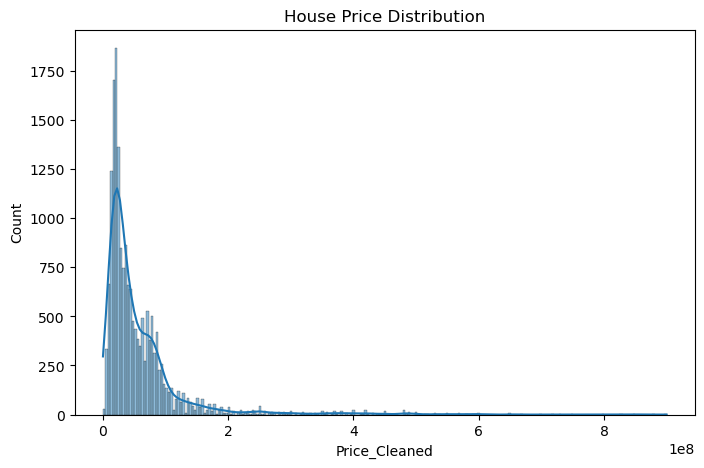

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price_Cleaned"], kde=True)
plt.title("House Price Distribution")
plt.show()


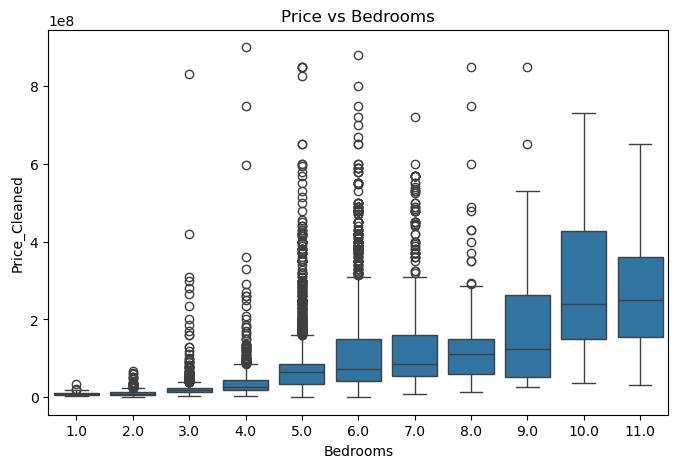

In [18]:
# Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x="Bedrooms", y="Price_Cleaned", data=df)
plt.title("Price vs Bedrooms")
plt.show()


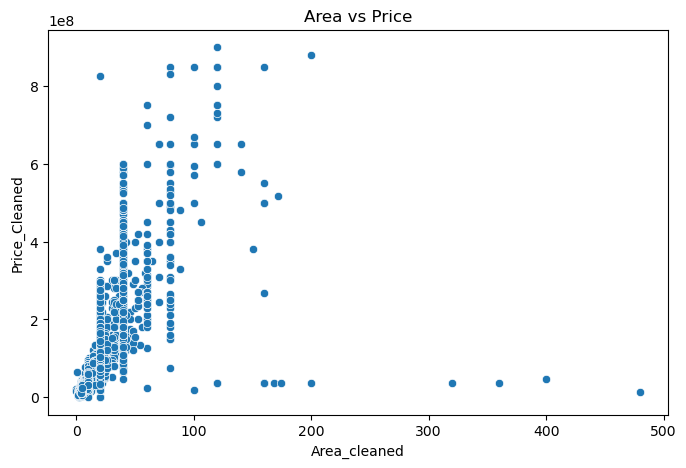

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Area_cleaned", y="Price_Cleaned", data=df)
plt.title("Area vs Price")
plt.show()


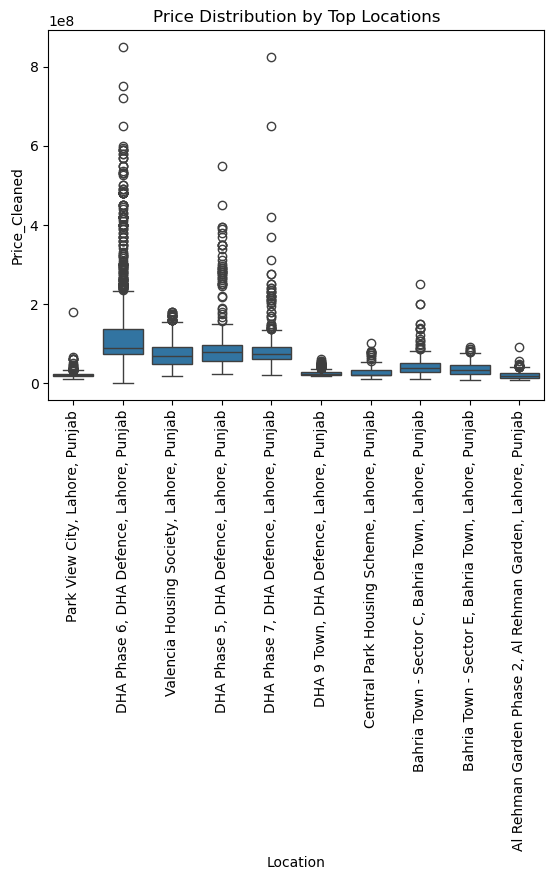

In [20]:
top_locations = df["Location"].value_counts().nlargest(10).index
sns.boxplot(x="Location", y="Price_Cleaned", data=df[df["Location"].isin(top_locations)])
plt.xticks(rotation=90)
plt.title("Price Distribution by Top Locations")
plt.show()

In [21]:
df.drop(columns=('Purpose'),axis=0,inplace=True)

In [22]:
bool_cols = ["Furnished","Gym","Study Room","Drawing Room","Dining Room",
             "Lawn/Garden","Swimming Pool","Electricity Backup","Lounge/Sitting Room"]

for col in bool_cols:
    df[col] = df[col].astype(int)


In [23]:
df.head()

,Location,Type,Bedrooms,Bathrooms,Built Year,Kitchens,Store Rooms,Servant Quarters,Furnished,Gym,Study Room,Drawing Room,Dining Room,Lawn/Garden,Swimming Pool,Electricity Backup,Lounge/Sitting Room,Price_Cleaned,Area_cleaned
0,"DHA Phase 6 - Block F, DHA Phase 6, DHA Defenc...",House,6.0,7.0,2024.0,3,2,2,1,1,1,1,1,1,1,1,1,81500000.0,20.0
1,"Park View City, Lahore, Punjab",House,4.0,5.0,2012.0,2,1,3,1,0,0,1,1,1,0,1,1,15000000.0,5.0
2,"Park View City - Rose Block, Park View City, L...",House,4.0,4.0,2025.0,2,1,1,1,1,1,1,1,1,1,1,1,24000000.0,5.0
3,"DHA Phase 7 - Block S, DHA Phase 7, DHA Defenc...",House,5.0,6.0,2024.0,2,1,1,0,1,1,1,1,1,1,1,1,75000000.0,20.0
4,"DHA Phase 6, DHA Defence, Lahore, Punjab",House,6.0,7.0,2024.0,0,0,0,1,1,1,1,1,1,1,1,1,69500000.0,20.0


In [25]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder() 
df['Location']=le.fit_transform(df['Location'])

In [28]:
df.head()

,Location,Type,Bedrooms,Bathrooms,Built Year,Kitchens,Store Rooms,Servant Quarters,Furnished,Gym,Study Room,Drawing Room,Dining Room,Lawn/Garden,Swimming Pool,Electricity Backup,Lounge/Sitting Room,Price_Cleaned,Area_cleaned
0,420,House,6.0,7.0,2024.0,3,2,2,1,1,1,1,1,1,1,1,1,81500000.0,20.0
1,1058,House,4.0,5.0,2012.0,2,1,3,1,0,0,1,1,1,0,1,1,15000000.0,5.0
2,1051,House,4.0,4.0,2025.0,2,1,1,1,1,1,1,1,1,1,1,1,24000000.0,5.0
3,433,House,5.0,6.0,2024.0,2,1,1,0,1,1,1,1,1,1,1,1,75000000.0,20.0
4,429,House,6.0,7.0,2024.0,0,0,0,1,1,1,1,1,1,1,1,1,69500000.0,20.0


In [29]:
df.drop(columns='Type',axis=True,inplace=True)

In [30]:
df.head()

,Location,Bedrooms,Bathrooms,Built Year,Kitchens,Store Rooms,Servant Quarters,Furnished,Gym,Study Room,Drawing Room,Dining Room,Lawn/Garden,Swimming Pool,Electricity Backup,Lounge/Sitting Room,Price_Cleaned,Area_cleaned
0,420,6.0,7.0,2024.0,3,2,2,1,1,1,1,1,1,1,1,1,81500000.0,20.0
1,1058,4.0,5.0,2012.0,2,1,3,1,0,0,1,1,1,0,1,1,15000000.0,5.0
2,1051,4.0,4.0,2025.0,2,1,1,1,1,1,1,1,1,1,1,1,24000000.0,5.0
3,433,5.0,6.0,2024.0,2,1,1,0,1,1,1,1,1,1,1,1,75000000.0,20.0
4,429,6.0,7.0,2024.0,0,0,0,1,1,1,1,1,1,1,1,1,69500000.0,20.0


In [31]:
df.describe()

,Location,Bedrooms,Bathrooms,Built Year,Kitchens,Store Rooms,Servant Quarters,Furnished,Gym,Study Room,Drawing Room,Dining Room,Lawn/Garden,Swimming Pool,Electricity Backup,Lounge/Sitting Room,Price_Cleaned,Area_cleaned
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,1.824900e+04,18249.000000
mean,554.756206,4.430818,5.067620,2022.993753,1.679489,0.793742,0.856704,0.505014,0.524631,0.718779,0.877856,0.858239,0.675599,0.452408,0.828155,0.774563,5.773127e+07,12.511776
std,340.251241,1.212127,1.197656,4.181815,1.057279,0.784329,1.244107,0.499989,0.499407,0.449607,0.327461,0.348815,0.468164,0.497744,0.377256,0.417881,7.177151e+07,12.804543
min,0.000000,1.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+00,0.000000
25%,318.000000,3.000000,4.000000,2024.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.050000e+07,5.000000
50%,431.000000,5.000000,5.000000,2024.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.550000e+07,10.000000
75%,845.000000,5.000000,6.000000,2025.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.100000e+07,20.000000
max,1303.000000,11.000000,8.000000,2025.000000,32.000000,22.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000e+08,480.000000


In [33]:
numeric=['Location','Bedrooms','Bathrooms','Built Year','Kitchens','Store Rooms','Servant Quarters','Area_cleaned']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[numeric]=scaler.fit_transform(df[numeric])

In [34]:
df.head()

,Location,Bedrooms,Bathrooms,Built Year,Kitchens,Store Rooms,Servant Quarters,Furnished,Gym,Study Room,Drawing Room,Dining Room,Lawn/Garden,Swimming Pool,Electricity Backup,Lounge/Sitting Room,Price_Cleaned,Area_cleaned
0,-0.396060,1.294604,1.613513,0.240631,1.249005,1.537992,0.918994,1,1,1,1,1,1,1,1,1,81500000.0,0.584826
1,1.479076,-0.355433,-0.056462,-2.629015,0.303155,0.262981,1.722806,1,0,0,1,1,1,0,1,1,15000000.0,-0.586665
2,1.458503,-0.355433,-0.891449,0.479768,0.303155,0.262981,0.115183,1,1,1,1,1,1,1,1,1,24000000.0,-0.586665
3,-0.357852,0.469586,0.778525,0.240631,0.303155,0.262981,0.115183,0,1,1,1,1,1,1,1,1,75000000.0,0.584826
4,-0.369608,1.294604,1.613513,0.240631,-1.588545,-1.012030,-0.688629,1,1,1,1,1,1,1,1,1,69500000.0,0.584826


In [35]:
X=df.drop(columns='Price_Cleaned',axis=0)
y=df['Price_Cleaned']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()

In [40]:
model_lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
y_pred=model_lr.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
print("Linear Regression R2",r2_score(y_test,y_pred))

Linear Regression R2 0.6548139949713868


In [62]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor(n_estimators=200,random_state=42)

In [63]:
model_rf.fit(X_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
y_pred=model_rf.predict(X_test)

In [65]:
print("Random Forest",r2_score(y_test,y_pred))

Random Forest 0.8009022897479077


In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.05,max_depth=5,subsample=0.8,random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
print("Gradient Boosting R2:", r2_score(y_test, y_pred))
print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred))

Gradient Boosting R2: 0.8172166805245145
Gradient Boosting MAE: 11748475.004680866


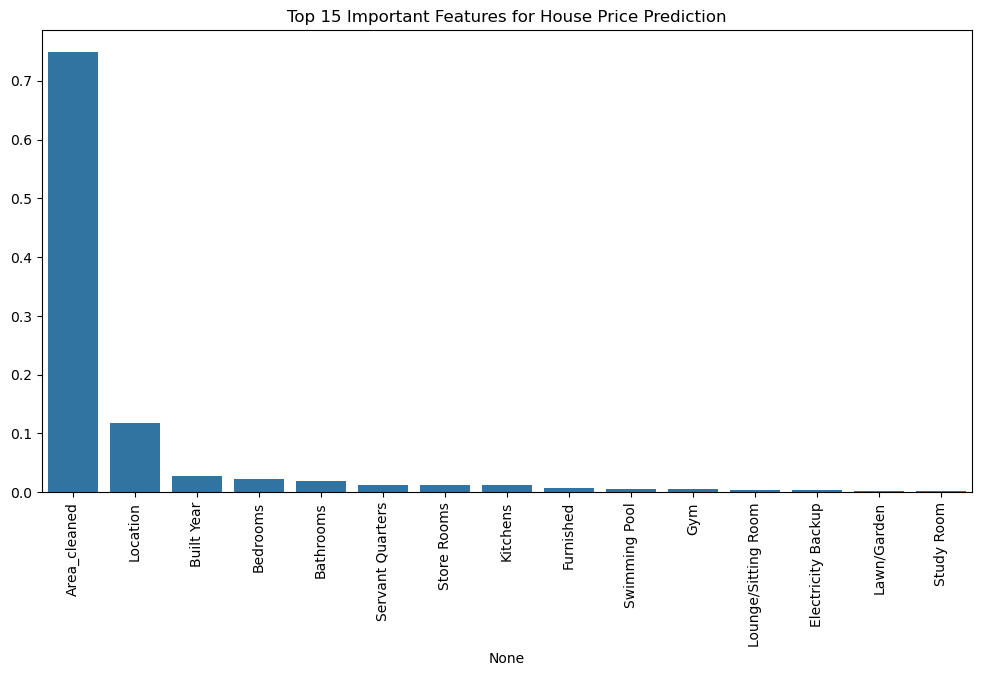

In [72]:
import numpy as np

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns[indices][:15], y=importances[indices][:15])
plt.xticks(rotation=90)
plt.title("Top 15 Important Features for House Price Prediction")
plt.show()


In [74]:
import joblib

# Save your trained XGBoost model
joblib.dump(gbr, "house_price_model.pkl")

# Save the Label/Target encoder if used
joblib.dump(le, "location_encoder.pkl")


['location_encoder.pkl']